## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import random
import numpy as np
from scipy.stats import sem


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
#print mouse csv
#mouse_metadata

In [3]:
#Print study results csv
#study_results

In [4]:
# Combine the data into a single dataset

# combined_df = mouse_metadata.merge(study_results, how = "outer", on = "Mouse ID")

# # Display the data table for previe
# combined_df

In [5]:
# Combine the data into a single dataset #ISIN 
combined_df = pd.merge(mouse_metadata, study_results, how = "right", on = "Mouse ID")
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [6]:
# Checking the number of mice.
num_mice = combined_df['Mouse ID'].nunique()
num_mice

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. same rows and same ID
duplicate_rows = combined_df.loc[combined_df.duplicated(subset= ["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_rows

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. just to visulize the duplicate data 

all_dup_rows = combined_df.loc[combined_df["Mouse ID"]=="g989"]
all_dup_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_df = all_dup_rows.drop_duplicates()
# clean_df

clean_df = combined_df[combined_df["Mouse ID"].isin(duplicate_rows)==False] #instead duplicate
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [10]:
#clean_df.

In [11]:
# Checking the number of mice in the clean DataFrame.
clean_num_mice = clean_df["Mouse ID"].nunique()
clean_num_mice

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance,
#standard deviation, and SEM of the tumor volume for each regimen

# mean = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
# print(mean)
# median = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()
# print(median)
# variance = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()
# print(variance)


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [13]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = combined_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
#print(mean)

median = combined_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()
# print(median)

variance = combined_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()
# print(variance)

standard_dev = combined_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].std()
# print(standard_dev)
    
sem = combined_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem()
# print(sem)

summary_st = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, 
                           "Standard Deviation": standard_dev, "SEM": sem})
summary_st

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#groupby datafrsame (tumor volume: mean, median mode, )


groupby_sum2 = combined_df.groupby("Drug Regimen")['Tumor Volume (mm3)']
groupby_sum2

aggregated_sum = groupby_sum2.agg(["mean", "median", "var", "std", "sem"])
aggregated_sum

# ****************
#aggregated_sum = groupby_sum2.agg({"Mean": ['mean'], "Median": ['median'], "Variance": ['variance'], 
#                            "Standard Deviation": ['standard_dev'], "SEM": ['sem']})

# aggregated_sum

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [15]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
uniq_df = pd.DataFrame(combined_df.groupby(["Drug Regimen"]).count()).reset_index()

uniq_df

,Drug Regimen,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,230,230,230,230,230,230,230
1,Ceftamin,178,178,178,178,178,178,178
2,Infubinol,178,178,178,178,178,178,178
3,Ketapril,188,188,188,188,188,188,188
4,Naftisol,186,186,186,186,186,186,186
5,Placebo,181,181,181,181,181,181,181
6,Propriva,161,161,161,161,161,161,161
7,Ramicane,228,228,228,228,228,228,228
8,Stelasyn,181,181,181,181,181,181,181
9,Zoniferol,182,182,182,182,182,182,182


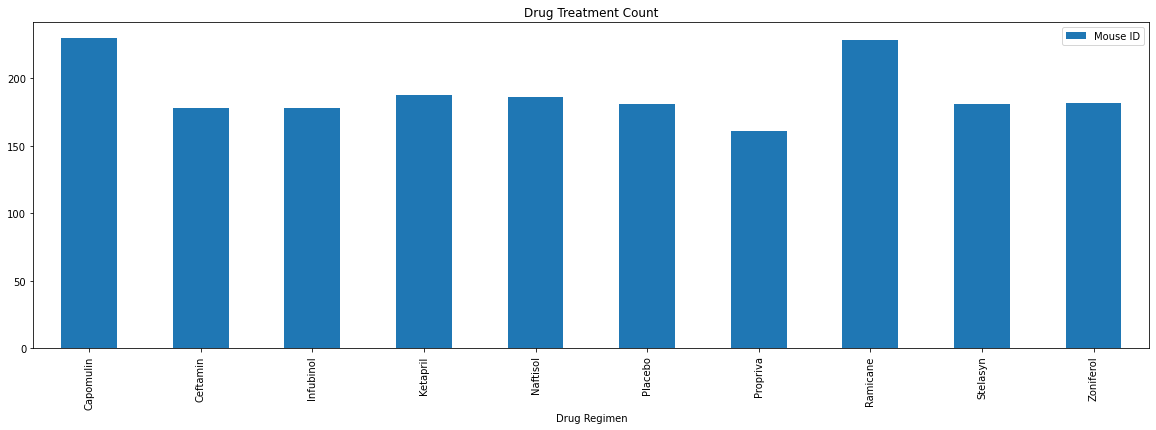

<Figure size 432x288 with 0 Axes>

In [16]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

uniq_column_df = uniq_df[["Drug Regimen", "Mouse ID"]]

uniq_column_df = uniq_column_df.set_index("Drug Regimen")

uni_pd_plot = uniq_column_df.plot(kind ="bar", figsize=(20,6))


plt.title("Drug Treatment Count")
plt.show()
plt.tight_layout()

In [17]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

drug_name = summary_st.index.tolist()
drug_name

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [18]:
mice_count = (combined_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_count

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

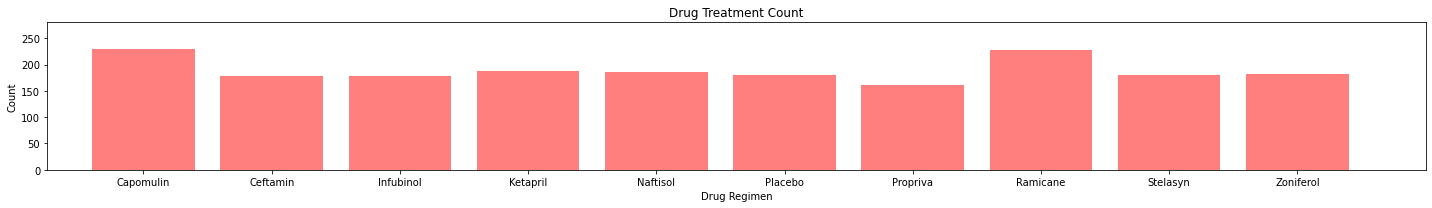

In [19]:
#x_axis = np.arange(len(mice_count))

x_axis = drug_name

plt.figure(figsize=(20,3))
plt.bar(x_axis, mice_count, color='r', alpha=0.5, align="center")
# plt.xticks(tick_locations, mice_count, rotation="vertical")

plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(mice_count)+50)

plt.tight_layout()

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(clean_df.groupby(["Sex"]).count()).reset_index()
gender_df.head()



,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,922,922,922,922,922,922,922
1,Male,958,958,958,958,958,958,958


In [21]:
gender_df = gender_df[["Sex", "Mouse ID"]]
gender_df


,Sex,Mouse ID
0,Female,922
1,Male,958


Text(0, 0.5, '')

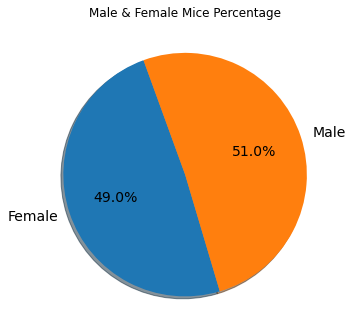

In [22]:
plt.figure(figsize=(12,6))
ax1 = plt.subplot(121, aspect="equal")

gender_df.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%1.1f%%',
              startangle=110, shadow=True, labels=gender_df["Sex"], legend = False, fontsize=14)

plt.title("Male & Female Mice Percentage")
plt.xlabel("")
plt.ylabel("")

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count = (clean_df.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

[922, 958]

In [24]:
labels = ["Females", "Males"]
colors = ["purple", "yellow"]
explode = (0.1, 0)

(-1.2326992565608714,
 1.1142426147360316,
 -1.167442932372966,
 1.1090109857788941)

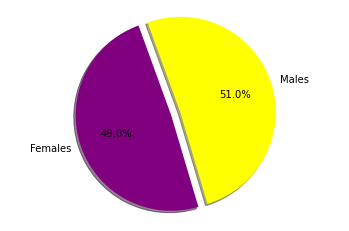

In [25]:
plt.pie(gender_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=110)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:Capomulin, Ramicane, Infubinol, and Ceftamin

#********id regi, timepi, tum .,group by drug regi
# Capomulin, Ramicane, Infubinol, and Ceftamin

#****************sorted_df = clean_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending = True)

# Start by getting the last (greatest) timepoint for each mouse

# ***********new_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
# ***********new_df.head().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#clean_df.groupby(["Drug Regimen", "Mouse ID"]).last()["Tumor Volume"]

# regimen4_df = new_df[new_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "ceftamin"])]
# regimen4_df.head(250).reset_index()

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drug_regimen_df = clean_df[clean_df["Drug Regimen"].isin (["Capomulin", "Ramicane", "Infubinol", "ceftamin"])]

drug_regimen_df = drug_regimen_df.sort_values(["Timepoint"], ascending = True)

drug_regimen_df 

drug_regimen_sort = drug_regimen_df[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]] 

drug_regimen_sort

last_tumor_vol = drug_regimen_sort.groupby(["Drug Regimen", "Mouse ID"]).last()["Tumor Volume (mm3)"]

last_tumor_vol

Drug Regimen  Mouse ID
Capomulin     b128        38.982878
              b742        38.939633
              f966        30.485985
              g288        37.074024
              g316        40.159220
                            ...    
Ramicane      s508        30.276232
              u196        40.667713
              w678        43.166373
              y449        44.183451
              z578        30.638696
Name: Tumor Volume (mm3), Length: 75, dtype: float64

In [28]:
# Start by getting the last (greatest) timepoint for each mouse

# sorted_df = clean_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending = True)

# Start by getting the last (greatest) timepoint for each mouse

greatest_time = clean_df.groupby(['Mouse ID'])["Timepoint"].max()

greatest_time = greatest_time.reset_index() 

greatest_time

# new_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
# new_df = new_df.reset_index()
# new_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge_vol = greatest_time.merge(clean_df, on=["Mouse ID", "Timepoint"], how="left")
merge_vol



# *****************below we have the tumor volume for each mouse at the last time point.****************************

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [29]:
# Put treatments into a list for for loop (and later for plot labels)

drug_list = ["Capomulin", "Ramicane", "Infubinol", "ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []   

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

value = 0

for drug in drug_list:
    quartiles = merge_vol['Tumor Volume (mm3)'].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    if value == 0:
         print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    value += 1
    
    tumor_vol_data.append(list(merge_vol['Drug Regimen'].dropna()))
#     print(f"The lower quartile of Tumor Volume is: {lowerq}")
#     print(f"The upper quartile of Tumor Volume is: {upperq}")
#     print(f"The interquartile range of Tumor Volume is: {iqr}")
#     print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
     # add subset ........
    
    
#     # Determine outliers using upper and lower bounds
#     lower_bound = round(lowerq - (1.5*iqr),2)
#     upper_bound = round(upperq + (1.5*iqr),2)
#     print(f"Values below {lower_bound} could be outliers.")
#     print(f"Values above {upper_bound} could be outliers.")

--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 45.88
The upper quartile of Capomulin is: 65.05
The interquartile range of Capomulin is: 19.17
The the median of Capomulin is: 55.79 
Values below 17.12 for Capomulin could be outliers.
Values above 93.8 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 45.88
The upper quartile of Ramicane is: 65.05
The interquartile range of Ramicane is: 19.17
The the median of Ramicane is: 55.79 
Values below 17.12 for Ramicane could be outliers.
Values above 93.8 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 45.88
The upper quartile of Infubinol is: 65.05
The interquartile range of Infubinol is: 19.17
The the median of Infubinol is: 55.79 
Values below 17.12 for Infubinol could be outliers.

In [30]:
merge_vol_2 = merge_vol[['Drug Regimen', 'Tumor Volume (mm3)']]
merge_vol_2.set_index('Drug Regimen')


,Tumor Volume (mm3)
Drug Regimen,
Infubinol,67.973419
Infubinol,65.525743
Placebo,70.717621
Ceftamin,62.999356
Stelasyn,63.440686
...,...
Propriva,48.710661
Ramicane,30.638696
Infubinol,62.754451


## Line and Scatter Plots

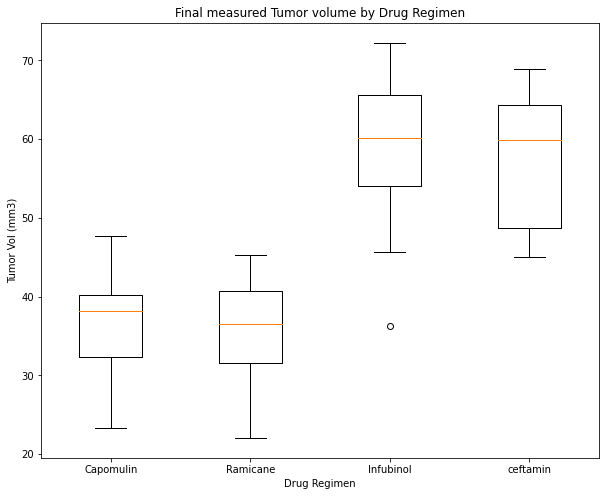

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interes

Capomulin = merge_vol.loc[merge_vol["Drug Regimen"] == "Capomulin"]
Ramicane = merge_vol.loc[merge_vol["Drug Regimen"] == "Ramicane"]
Infubinol = merge_vol.loc[merge_vol["Drug Regimen"] == "Infubinol"]
Ceftamin = merge_vol.loc[merge_vol["Drug Regimen"] == "Ceftamin"]
x_axisCa = Capomulin["Tumor Volume (mm3)"]
x_axisR = Ramicane["Tumor Volume (mm3)"]
x_axisI = Infubinol["Tumor Volume (mm3)"]
x_axisCe = Ceftamin["Tumor Volume (mm3)"]

#tumor_vol_data.append(list(merge_vol['Drug Regimen'].dropna()))
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Final measured Tumor volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot([x_axisCa, x_axisR, x_axisI, x_axisCe])
plt.xticks([1,2,3,4], drug_list)
plt.show()

Text(0, 0.5, 'Tumor Volume (mm3)')

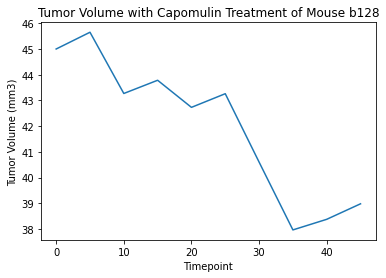

In [32]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis = combined_df.loc[combined_df["Mouse ID"] == "b128"]
x_axis = x_axis["Timepoint"]
y_axis = combined_df.loc[combined_df["Mouse ID"] == "b128"]
y_axis = y_axis["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.title("Tumor Volume with Capomulin Treatment of Mouse b128")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)") 

In [33]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_weight_ca = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
mouse_weight_ca

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
226,j246,Capomulin,Female,21,21,0,45.000000,0
227,r554,Capomulin,Female,8,17,0,45.000000,0
228,s185,Capomulin,Female,3,17,0,45.000000,0
229,b742,Capomulin,Male,7,21,0,45.000000,0
...,...,...,...,...,...,...,...,...
1854,s710,Capomulin,Female,1,23,45,40.728578,1
1859,j119,Capomulin,Female,7,23,45,38.125164,1
1878,i557,Capomulin,Female,1,24,45,47.685963,1
1888,r944,Capomulin,Male,12,25,45,41.581521,2


Text(0, 0.5, 'Tumor Volume (mm3)')

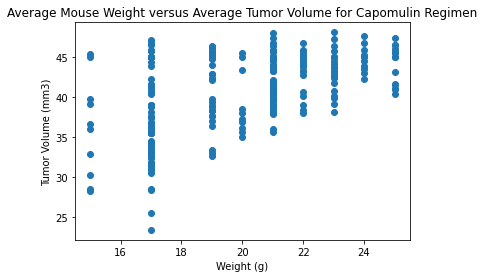

In [34]:
mouse_weight = mouse_weight_ca["Weight (g)"]
tumor_volume = mouse_weight_ca["Tumor Volume (mm3)"]
plt.scatter(mouse_weight, tumor_volume)
plt.title("Average Mouse Weight versus Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

In [35]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


The correlation between both weight and tumor volume is 0.53


Text(0, 0.5, 'Tumor Volume (mm3)')

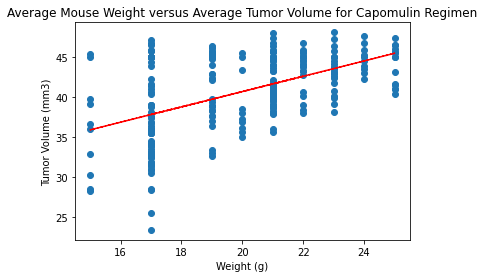

In [36]:
correlation = st.pearsonr(mouse_weight, tumor_volume)
print(f"The correlation between both weight and tumor volume is {round(correlation[0],2)}")

slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)
fit = slope * mouse_weight + int
plt.scatter(mouse_weight, tumor_volume)
plt.plot(mouse_weight, fit, "--", color="r")
plt.title("Average Mouse Weight versus Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")